<a href="https://colab.research.google.com/github/gpostill/Applied-ML-for-Healthcare-Course-Project/blob/main/NLP_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Natural Language Processing of articles on mmultimorbidity research implementing machine learning that includes equity, diversity and equality

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation

# Read the data from a CSV file named "nlp.csv" into a DataFrame
df = pd.read_csv("nlp2.csv", encoding='ISO-8859-1')

# Select specific columns ('title', 'abstract', and 'discussion') from the DataFrame
df = df[['Title', 'Abstract', 'Discussion']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,Title,Abstract,Discussion
0,"Leveraging Responsible, Explainable, and Local...","In the present paper, we will explore how arti...","In the present paper, we explored how AI and B..."
1,Artificial intelligence in gastroenterology an...,Artificial intelligence (AI) and machine learn...,We describe 5 themes to illustrate how AI/ML c...
2,Multimorbidity and equity in health,Two major challenges are at play in the design...,This special series aims to contribute to the ...
3,Implementation of prognostic machine learning ...,Machine learning (ML) holds great potential fo...,The 25 prognostic ML studies assessed in this ...
4,Machine Learning Techniques for Personalised M...,"In the past decade, the emergence of machine l...",Reproducibility and External Validation in Mac...


In [ ]:
df.dtypes

Title         object
Abstract      object
Discussion    object
dtype: object

In [ ]:
df.shape

(64, 3)

In [ ]:
# Basic data cleaning #

# - Lowercasing the texts
# - Removing special characters and numbers

# Function to remove special characters and numbers
import re
def remove_special_characters(text):
    if pd.isnull(text):
        return ''
    else:
        return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['Title'] = df['Title'].str.lower()
df['Abstract'] = df['Abstract'].str.lower()
df['Discussion'] = df['Discussion'].str.lower()
df['title'] = df['Title'].apply(remove_special_characters)
df['abstract'] = df['Abstract'].apply(remove_special_characters)
df['discussion'] = df['Discussion'].apply(remove_special_characters)

df.head()

,Title,Abstract,Discussion,title,abstract,discussion
0,"leveraging responsible, explainable, and local...","in the present paper, we will explore how arti...","in the present paper, we explored how ai and b...",leveraging responsible explainable and local a...,in the present paper we will explore how artif...,in the present paper we explored how ai and bd...
1,artificial intelligence in gastroenterology an...,artificial intelligence (ai) and machine learn...,we describe 5 themes to illustrate how ai/ml c...,artificial intelligence in gastroenterology an...,artificial intelligence ai and machine learnin...,we describe themes to illustrate how aiml can...
2,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...
3,implementation of prognostic machine learning ...,machine learning (ml) holds great potential fo...,the 25 prognostic ml studies assessed in this ...,implementation of prognostic machine learning ...,machine learning ml holds great potential for ...,the prognostic ml studies assessed in this sc...
4,machine learning techniques for personalised m...,"in the past decade, the emergence of machine l...",reproducibility and external validation in mac...,machine learning techniques for personalised m...,in the past decade the emergence of machine le...,reproducibility and external validation in mac...


In [ ]:
## Apply tokenization ##

# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
   return word_tokenize(text)

df['tokens'] = df['title'].apply(tokenize_text)
df['tokens'] = df['abstract'].apply(tokenize_text)
df['tokens'] = df['discussion'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Title,Abstract,Discussion,title,abstract,discussion,tokens
0,"leveraging responsible, explainable, and local...","in the present paper, we will explore how arti...","in the present paper, we explored how ai and b...",leveraging responsible explainable and local a...,in the present paper we will explore how artif...,in the present paper we explored how ai and bd...,"[in, the, present, paper, we, explored, how, a..."
1,artificial intelligence in gastroenterology an...,artificial intelligence (ai) and machine learn...,we describe 5 themes to illustrate how ai/ml c...,artificial intelligence in gastroenterology an...,artificial intelligence ai and machine learnin...,we describe themes to illustrate how aiml can...,"[we, describe, themes, to, illustrate, how, ai..."
2,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,"[this, special, series, aims, to, contribute, ..."
3,implementation of prognostic machine learning ...,machine learning (ml) holds great potential fo...,the 25 prognostic ml studies assessed in this ...,implementation of prognostic machine learning ...,machine learning ml holds great potential for ...,the prognostic ml studies assessed in this sc...,"[the, prognostic, ml, studies, assessed, in, t..."
4,machine learning techniques for personalised m...,"in the past decade, the emergence of machine l...",reproducibility and external validation in mac...,machine learning techniques for personalised m...,in the past decade the emergence of machine le...,reproducibility and external validation in mac...,"[reproducibility, and, external, validation, i..."


In [ ]:
## Apply Lemmatization ##

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Display the DataFrame
df[['title', 'abstract', 'discussion', 'tokens', 'lemmatized']].head()

,title,abstract,discussion,tokens,lemmatized
0,leveraging responsible explainable and local a...,in the present paper we will explore how artif...,in the present paper we explored how ai and bd...,"[in, the, present, paper, we, explored, how, a...","[in, the, present, paper, we, explore, how, ai..."
1,artificial intelligence in gastroenterology an...,artificial intelligence ai and machine learnin...,we describe themes to illustrate how aiml can...,"[we, describe, themes, to, illustrate, how, ai...","[we, describe, theme, to, illustrate, how, aim..."
2,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,"[this, special, series, aims, to, contribute, ...","[this, special, series, aim, to, contribute, t..."
3,implementation of prognostic machine learning ...,machine learning ml holds great potential for ...,the prognostic ml studies assessed in this sc...,"[the, prognostic, ml, studies, assessed, in, t...","[the, prognostic, ml, study, assess, in, this,..."
4,machine learning techniques for personalised m...,in the past decade the emergence of machine le...,reproducibility and external validation in mac...,"[reproducibility, and, external, validation, i...","[reproducibility, and, external, validation, i..."


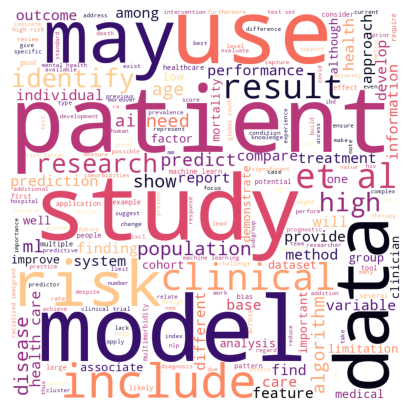

In [ ]:
## Produce post-lemmatization word cloud##

# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
## Remove stop words##

# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. Necessary the first time this code is run
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
def remove_stop_words(lemmatized):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words
    # The token is also converted to lowercase to ensure case-insensitive matching
    return [token for token in lemmatized if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'
# The result is a new column 'lemmatized_no_stop' in the dataframe 'df'
df['lemmatized_no_stop'] = df['lemmatized'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'abstract', 'discussion', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['title', 'abstract', 'discussion', 'tokens', 'lemmatized', 'lemmatized_no_stop']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,abstract,discussion,tokens,lemmatized,lemmatized_no_stop
0,leveraging responsible explainable and local a...,in the present paper we will explore how artif...,in the present paper we explored how ai and bd...,"[in, the, present, paper, we, explored, how, a...","[in, the, present, paper, we, explore, how, ai...","[present, paper, explore, ai, bda, help, addre..."
1,artificial intelligence in gastroenterology an...,artificial intelligence ai and machine learnin...,we describe themes to illustrate how aiml can...,"[we, describe, themes, to, illustrate, how, ai...","[we, describe, theme, to, illustrate, how, aim...","[describe, theme, illustrate, aiml, lead, ineq..."
2,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,"[this, special, series, aims, to, contribute, ...","[this, special, series, aim, to, contribute, t...","[special, series, aim, contribute, grow, body,..."
3,implementation of prognostic machine learning ...,machine learning ml holds great potential for ...,the prognostic ml studies assessed in this sc...,"[the, prognostic, ml, studies, assessed, in, t...","[the, prognostic, ml, study, assess, in, this,...","[prognostic, ml, study, assess, scoping, revie..."
4,machine learning techniques for personalised m...,in the past decade the emergence of machine le...,reproducibility and external validation in mac...,"[reproducibility, and, external, validation, i...","[reproducibility, and, external, validation, i...","[reproducibility, external, validation, machin..."


In [ ]:
## Remove context-specific stop words ##

# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['ai', 'artificial intelligence', 'ml', 'machine learning', 'bda', 'eg', 'background', 'methods', 'method', 'results', 'conclusion', 'conclusions', 'limitations', 'objectives', 'objective', 'aim', 'aims', 'paper', 'aiml', 'nlp', 'et al', 'etal', 'et', 'al', 'may', 'use', 'identify', 'show', 'machine', 'learn', 'dataset'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(lemmatized):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in lemmatized if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['lemmatized_no_stop_context'] = df['lemmatized'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['title', 'abstract', 'discussion', 'tokens', 'lemmatized', 'lemmatized_no_stop_context']].head()


,title,abstract,discussion,tokens,lemmatized,lemmatized_no_stop_context
0,leveraging responsible explainable and local a...,in the present paper we will explore how artif...,in the present paper we explored how ai and bd...,"[in, the, present, paper, we, explored, how, a...","[in, the, present, paper, we, explore, how, ai...","[present, explore, help, address, clinical, pu..."
1,artificial intelligence in gastroenterology an...,artificial intelligence ai and machine learnin...,we describe themes to illustrate how aiml can...,"[we, describe, themes, to, illustrate, how, ai...","[we, describe, theme, to, illustrate, how, aim...","[describe, theme, illustrate, lead, inequity, ..."
2,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,"[this, special, series, aims, to, contribute, ...","[this, special, series, aim, to, contribute, t...","[special, series, contribute, grow, body, know..."
3,implementation of prognostic machine learning ...,machine learning ml holds great potential for ...,the prognostic ml studies assessed in this sc...,"[the, prognostic, ml, studies, assessed, in, t...","[the, prognostic, ml, study, assess, in, this,...","[prognostic, study, assess, scoping, review, o..."
4,machine learning techniques for personalised m...,in the past decade the emergence of machine le...,reproducibility and external validation in mac...,"[reproducibility, and, external, validation, i...","[reproducibility, and, external, validation, i...","[reproducibility, external, validation, learni..."


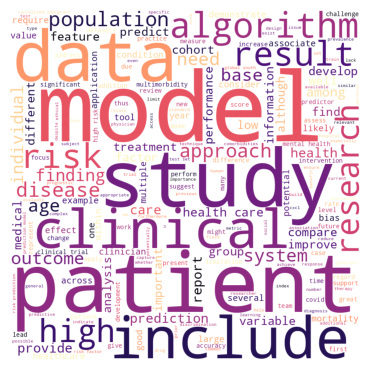

In [ ]:
## Produce a word cloud ##

# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df['lemmatized_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
## Create word embeddings ##
# Ensure to comment the line below after installing the library
!pip install gensim
import gensim.downloader as api
import numpy as np

# Load pre-trained GloVe model
glove_model = api.load('glove-wiki-gigaword-100')  # GloVe model trained on Wikipedia 2014 + Gigaword 5

# Example function to vectorize a list of tokens using the GloVe model
def vectorize(tokens):
    # Filter out tokens not in the model's vocabulary
    tokens = [token for token in tokens if token in glove_model.key_to_index]

    # If no words in the tweet are in the model's vocabulary, return a zero vector
    if len(tokens) == 0:
        return np.zeros(glove_model.vector_size)

    # Compute the mean of the word vectors for the tokens
    word_vectors = [glove_model[token] for token in tokens]
    return np.mean(word_vectors, axis=0)

# Apply the vectorization to each row's tokens
df['embedding'] = df['lemmatized'].apply(vectorize)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Now df['embedding'] contains the word embedding vectors for each row
df.head()

,Title,Abstract,Discussion,title,abstract,discussion,tokens,tokens_no_stop,tokens_no_stop_context,lemmatized,embedding
0,"leveraging responsible, explainable, and local...","in the present paper, we will explore how arti...","in the present paper, we explored how ai and b...",leveraging responsible explainable and local a...,in the present paper we will explore how artif...,in the present paper we explored how ai and bd...,"[in, the, present, paper, we, explored, how, a...","[present, paper, explored, ai, bda, help, addr...","[present, explored, help, address, clinical, p...","[present, explore, help, address, clinical, pu...","[-0.07536213, 0.2683683, 0.120150164, 0.234788..."
1,artificial intelligence in gastroenterology an...,artificial intelligence (ai) and machine learn...,we describe 5 themes to illustrate how ai/ml c...,artificial intelligence in gastroenterology an...,artificial intelligence ai and machine learnin...,we describe themes to illustrate how aiml can...,"[we, describe, themes, to, illustrate, how, ai...","[describe, themes, illustrate, aiml, lead, ine...","[describe, themes, illustrate, lead, inequitie...","[describe, theme, illustrate, lead, inequity, ...","[-0.18946621, 0.26671466, 0.12636961, 0.226812..."
2,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,multimorbidity and equity in health,two major challenges are at play in the design...,this special series aims to contribute to the ...,"[this, special, series, aims, to, contribute, ...","[special, series, aims, contribute, growing, b...","[special, series, contribute, growing, body, k...","[special, series, contribute, grow, body, know...","[-0.18151328, 0.32354647, 0.097566165, 0.19095..."
3,implementation of prognostic machine learning ...,machine learning (ml) holds great potential fo...,the 25 prognostic ml studies assessed in this ...,implementation of prognostic machine learning ...,machine learning ml holds great potential for ...,the prognostic ml studies assessed in this sc...,"[the, prognostic, ml, studies, assessed, in, t...","[prognostic, ml, studies, assessed, scoping, r...","[prognostic, studies, assessed, scoping, revie...","[prognostic, study, assess, scoping, review, o...","[-0.21249203, 0.24590187, 0.11032484, 0.183941..."
4,machine learning techniques for personalised m...,"in the past decade, the emergence of machine l...",reproducibility and external validation in mac...,machine learning techniques for personalised m...,in the past decade the emergence of machine le...,reproducibility and external validation in mac...,"[reproducibility, and, external, validation, i...","[reproducibility, external, validation, machin...","[reproducibility, external, validation, machin...","[reproducibility, external, validation, machin...","[-0.1463793, 0.21776175, 0.082760505, 0.192532..."
